In [1]:
import os
# SQL LOGIN
host = os.getenv('sqlHOST')
user = os.getenv('sqlUSER')
password = os.getenv('sqlPSWD')


# Exercises: Data Science Libraries - ADVANCED DATAFRAMES

<a href = "https://ds.codeup.com/python/advanced-dataframes/#exercises-ii">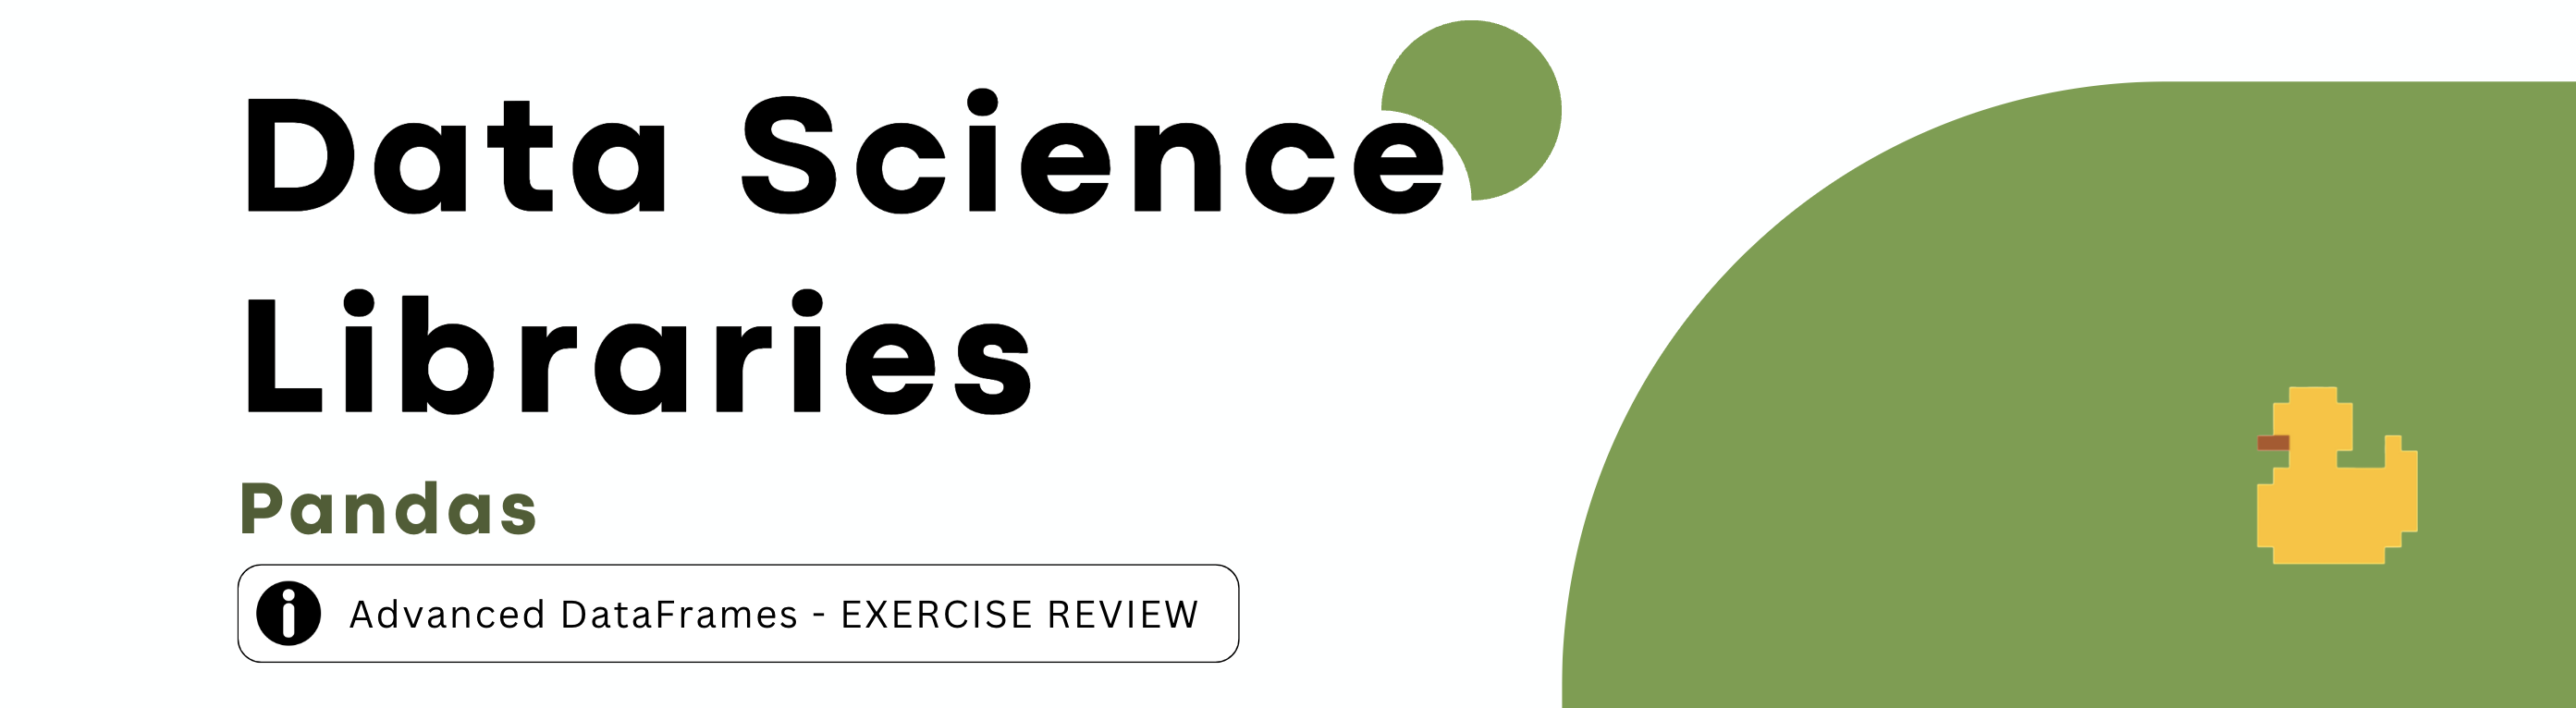</a>

<hr style="border:2px solid gray">

# Part 1

# 1. Run `python -m pip install pymysql` from your terminal to install the mysql client (any folder is fine)

done!

# 2. cd into your exercises folder for this module and run `echo env.py >> .gitignore`

done!

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import text, create_engine
#from env import user, password, host

# 3. Create a function named `get_db_url`. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [3]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

# 4. Use your function to obtain a connection to the `employees` database.

In [33]:
url = get_db_url('employees')

# 5. Once you have successfully run a query:

In [34]:
pd.read_sql('select * from employees limit 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


## a. Intentionally make a typo in the database url. What kind of error message do you see?

In [38]:
url = get_db_url('employeessssssss')

In [40]:
# pd.read_sql('select * from employees limit 5', url)

## b. Intentionally make an error in your SQL query. What does the error message look like?

In [42]:
url = get_db_url('employees')

In [45]:
# pd.read_sql('select from employees limit 5', url)

# 6. Read the `employees` and `titles` tables into two separate DataFrames.

In [ ]:
employees = pd.read_sql('select * from employees', url)

In [46]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [ ]:
titles = pd.read_sql('select * from titles', url)

In [47]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


# 7. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [48]:
employees.shape

(300024, 6)

In [49]:
titles.shape

(443308, 4)

# 8. Display the summary statistics for each DataFrame.

In [51]:
employees.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [52]:
titles.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


# 9. How many unique titles are in the titles DataFrame?

In [57]:
titles.title.nunique()

7

In [59]:
len(titles.title.unique())

7

In [60]:
titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

# 10. What is the oldest date in the to_date column?

In [64]:
titles.to_date.min()

datetime.date(1985, 3, 1)

# 11. What is the most recent date in the to_date column?

In [65]:
titles.to_date.max()

datetime.date(9999, 1, 1)

In [74]:
#if we wanted to filter out the 9999 date
titles [titles.to_date != titles.to_date.max()].to_date.max()

datetime.date(2002, 8, 1)

# Part 2

## 1. Copy the `users` and `roles` DataFrames from the examples above.

In [4]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [5]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


## 2. What is the result of using a `right` join on the DataFrames?

In [6]:
pd.merge(users, roles, how='right', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [7]:
users.merge(roles, how='right', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


## 3. What is the result of using an `outer` join on the DataFrames?

In [8]:
users.merge(roles, how='outer', left_on='role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


## 4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [9]:
users = users.drop(columns='role_id')
users

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [10]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [11]:
pd.merge(users,roles,how='inner',on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


- this isn't an accurate reflection of people's roles 

## 5. Load the `mpg` dataset from PyDataset.

In [12]:
from pydataset import data

In [13]:
cars = data('mpg')
cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 6. Output and read the documentation for the `mpg` dataset.

In [14]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




## 7. How many rows and columns are in the dataset?

In [15]:
cars.shape

(234, 11)

## 8. Check out your column names and perform any cleanup you may want on them.

In [16]:
cars.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [17]:
cars = cars.rename(columns={'class':'cls'})

In [18]:
cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cls
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 9. Display the summary statistics for the dataset.

In [19]:
cars.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cls
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


## 10. How many different manufacturers are there?

In [20]:
cars.manufacturer.nunique()

15

In [21]:
cars.manufacturer.unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

## 11. How many different models are there?

In [22]:
cars.model.unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [23]:
cars.model.nunique()

38

In [24]:
cars['model'].nunique()

38

## 12. Create a column named `mileage_difference` like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [25]:
cars['mileage_difference'] = cars.hwy - cars.cty

In [26]:
cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cls,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


## 13. Create a column named `average_mileage` like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [27]:
cars[['cty','hwy']].agg('mean', axis=1)

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

In [28]:
cars['average_mileage'] = cars[['cty','hwy']].mean(axis=1)

In [29]:
cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cls,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


## 14. Create a new column on the `mpg` dataset named `is_automatic` that holds boolean values denoting whether the car has an automatic transmission.

In [30]:
cars.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [31]:
cars['is_automatic'] = cars.trans.str.contains('auto')

In [32]:
# np.where(cars.trans.str.contains('auto'), True, False)

In [33]:
cars

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cls,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [34]:
'auto' in cars.trans #only works for a single string

False

In [35]:
cars.trans.apply(lambda x: 'auto' in x)

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

## 15. Using the `mpg` dataset, find out which which manufacturer has the best miles per gallon on average?

In [36]:
cars.groupby('manufacturer').mean().average_mileage.sort_values().tail(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [37]:
cars.groupby('manufacturer').mean().average_mileage.sort_values(ascending=False).head(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [38]:
cars.groupby('manufacturer').mean().average_mileage.nlargest(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [39]:
cars.groupby('manufacturer')['average_mileage'].mean().nlargest(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

## 16. Do automatic or manual cars have better miles per gallon?

In [40]:
cars.groupby('is_automatic').mean().average_mileage.head(1)

is_automatic
False    22.227273
Name: average_mileage, dtype: float64

___
# Part 3

## 1. Use your `get_db_url` function to help you explore the data from the chipotle database.

In [51]:
engine = create_engine(get_db_url('chipotle'))

In [53]:
pd.read_sql(text('show tables'), engine.connect())

,Tables_in_chipotle
0,orders


In [55]:
orders = pd.read_sql(text('select * from orders'), engine.connect())

In [4]:
url = get_db_url('chipotle')

In [5]:
pd.read_sql('show tables', url)

,Tables_in_chipotle
0,orders


In [7]:
orders = pd.read_sql('select * from orders', url)

In [56]:
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


## 2. What is the total price for each order?

In [57]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    $2.39 $3.39 $3.39 $2.39 
2                     $16.98 
3               $10.98 $1.69 
4               $11.75 $9.25 
5                $9.25 $4.45 
Name: item_price, dtype: object

In [58]:
orders.item_price = orders.item_price.str.strip('$').astype(float)

In [59]:
orders.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [60]:
orders.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

## 3. What are the most popular 3 items?

In [61]:
orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [62]:
orders.groupby('item_name')['quantity'].sum().head()

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

In [63]:
orders.groupby('item_name').quantity.sum().head()

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

## 4. Which item has produced the most revenue?

In [64]:
orders [orders.item_name == 'Chicken Bowl'].sort_values('quantity')

,id,order_id,quantity,item_name,choice_description,item_price
2452,2453,973,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Lettuce]]",8.75
3107,3108,1240,1,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, C...",8.49
3124,3125,1246,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]",8.75
3172,3173,1268,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",8.75
3174,3175,1269,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Fajita Vegetables, Lettuce, Pinto Beans, Black Beans...",11.25
...,...,...,...,...,...,...
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",17.50
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",26.25


In [65]:
orders.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

## 5. Join the `employees` and `titles` DataFrames together.

In [8]:
url = get_db_url('employees')

In [9]:
employees = pd.read_sql('select * from employees', url)

In [10]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [11]:
titles = pd.read_sql('select * from titles', url)

In [12]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [73]:
emp_titles = pd.merge(employees, titles, on='emp_no')

In [74]:
emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


## 6. For each title, find the hire date of the employee that was hired most recently with that title.

In [75]:
emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [76]:
#extra: change to df to merge back onto employee titles to get employee names
max_hire_dates = emp_titles.groupby('title').hire_date.max()
max_hire_dates = pd.DataFrame(max_hire_dates).reset_index()
max_hire_dates

,title,hire_date
0,Assistant Engineer,1999-12-24
1,Engineer,2000-01-28
2,Manager,1992-02-05
3,Senior Engineer,2000-01-01
4,Senior Staff,2000-01-13
5,Staff,2000-01-12
6,Technique Leader,1999-12-31


In [77]:
pd.merge(emp_titles, max_hire_dates, on=['title','hire_date']).sort_values('title')

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
4,243702,1961-10-04,Munehiro,Luke,F,1999-12-24,Assistant Engineer,2000-01-07,9999-01-01
6,463807,1964-06-12,Bikash,Covnot,M,2000-01-28,Engineer,2000-02-01,2000-05-19
2,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,Manager,1996-08-30,9999-01-01
1,108201,1955-04-14,Mariangiola,Boreale,M,2000-01-01,Senior Engineer,2000-01-01,9999-01-01
3,222965,1959-08-07,Volkmar,Perko,F,2000-01-13,Senior Staff,2000-01-29,9999-01-01
0,47291,1960-09-09,Ulf,Flexer,M,2000-01-12,Staff,2000-01-26,9999-01-01
5,294732,1960-11-07,Karlis,Orsini,M,1999-12-31,Technique Leader,2000-01-28,2001-07-04


## 7. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [78]:
emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [81]:
emp_dept = pd.read_sql(text('''
select *
from dept_emp
	join departments
		using (dept_no)
'''), engine.connect()
)


In [82]:
emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [83]:
emp_dept.head()

,dept_no,emp_no,from_date,to_date,dept_name
0,d009,10011,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1992-03-21,9999-01-01,Customer Service


In [84]:
emp_title_dept = pd.merge(emp_titles, emp_dept, on='emp_no')
emp_title_dept.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01,Production


In [85]:
pd.crosstab(emp_title_dept.title, emp_title_dept.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0
